In [89]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [90]:
gk_attributes = pd.read_csv('gk_attributes.csv')
fl_attributes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152880 entries, 0 to 152879
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   overall_rating  152780 non-null  float64
 1   dribbling       151944 non-null  float64
 2   height          152880 non-null  float64
 3   weight          152880 non-null  int64  
 4   pace            152780 non-null  float64
 5   shooting        151944 non-null  float64
 6   passing         151944 non-null  float64
 7   defending       151944 non-null  float64
 8   physical        151944 non-null  float64
dtypes: float64(8), int64(1)
memory usage: 10.5 MB


In [91]:
fl_attributes = pd.read_csv('fl_attributes.csv')
fl_attributes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152880 entries, 0 to 152879
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   player_api_id         152880 non-null  int64  
 1   date                  152880 non-null  object 
 2   overall_rating        152780 non-null  float64
 3   dribbling             151944 non-null  float64
 4   player_name           152880 non-null  object 
 5   height                152880 non-null  float64
 6   weight                152880 non-null  int64  
 7   preferred_foot_right  152880 non-null  bool   
 8   pace                  152780 non-null  float64
 9   shooting              151944 non-null  float64
 10  passing               151944 non-null  float64
 11  defending             151944 non-null  float64
 12  physical              151944 non-null  float64
dtypes: bool(1), float64(8), int64(2), object(2)
memory usage: 14.1+ MB


In [92]:
gk_attributes.drop(columns=['player_api_id', 'date', 'player_name'], inplace=True)
gk_attributes.head()

,overall_rating,sprint_speed,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,height,weight
0,48.0,26.0,53.0,41.0,39.0,51.0,53.0,190.5,181
1,48.0,26.0,53.0,41.0,39.0,51.0,53.0,190.5,181
2,48.0,26.0,53.0,41.0,39.0,51.0,53.0,190.5,181
3,48.0,26.0,53.0,41.0,39.0,51.0,53.0,190.5,181
4,48.0,26.0,53.0,41.0,39.0,51.0,53.0,190.5,181


In [93]:
fl_attributes.drop(columns=['player_api_id', 'date', 'player_name', 'preferred_foot_right'], inplace=True)
fl_attributes.head()

,overall_rating,dribbling,height,weight,pace,shooting,passing,defending,physical
0,67.0,51.80,182.88,187,62.20,44.65,55.75,68.2,72.15
1,67.0,51.80,182.88,187,62.20,44.65,55.75,68.2,72.15
2,62.0,51.80,182.88,187,62.20,44.65,55.75,61.5,70.15
3,61.0,50.95,182.88,187,62.20,43.65,54.75,59.1,69.90
4,74.0,73.65,170.18,146,78.45,58.40,71.20,72.3,69.00


Рассмотрим данные вратарей 

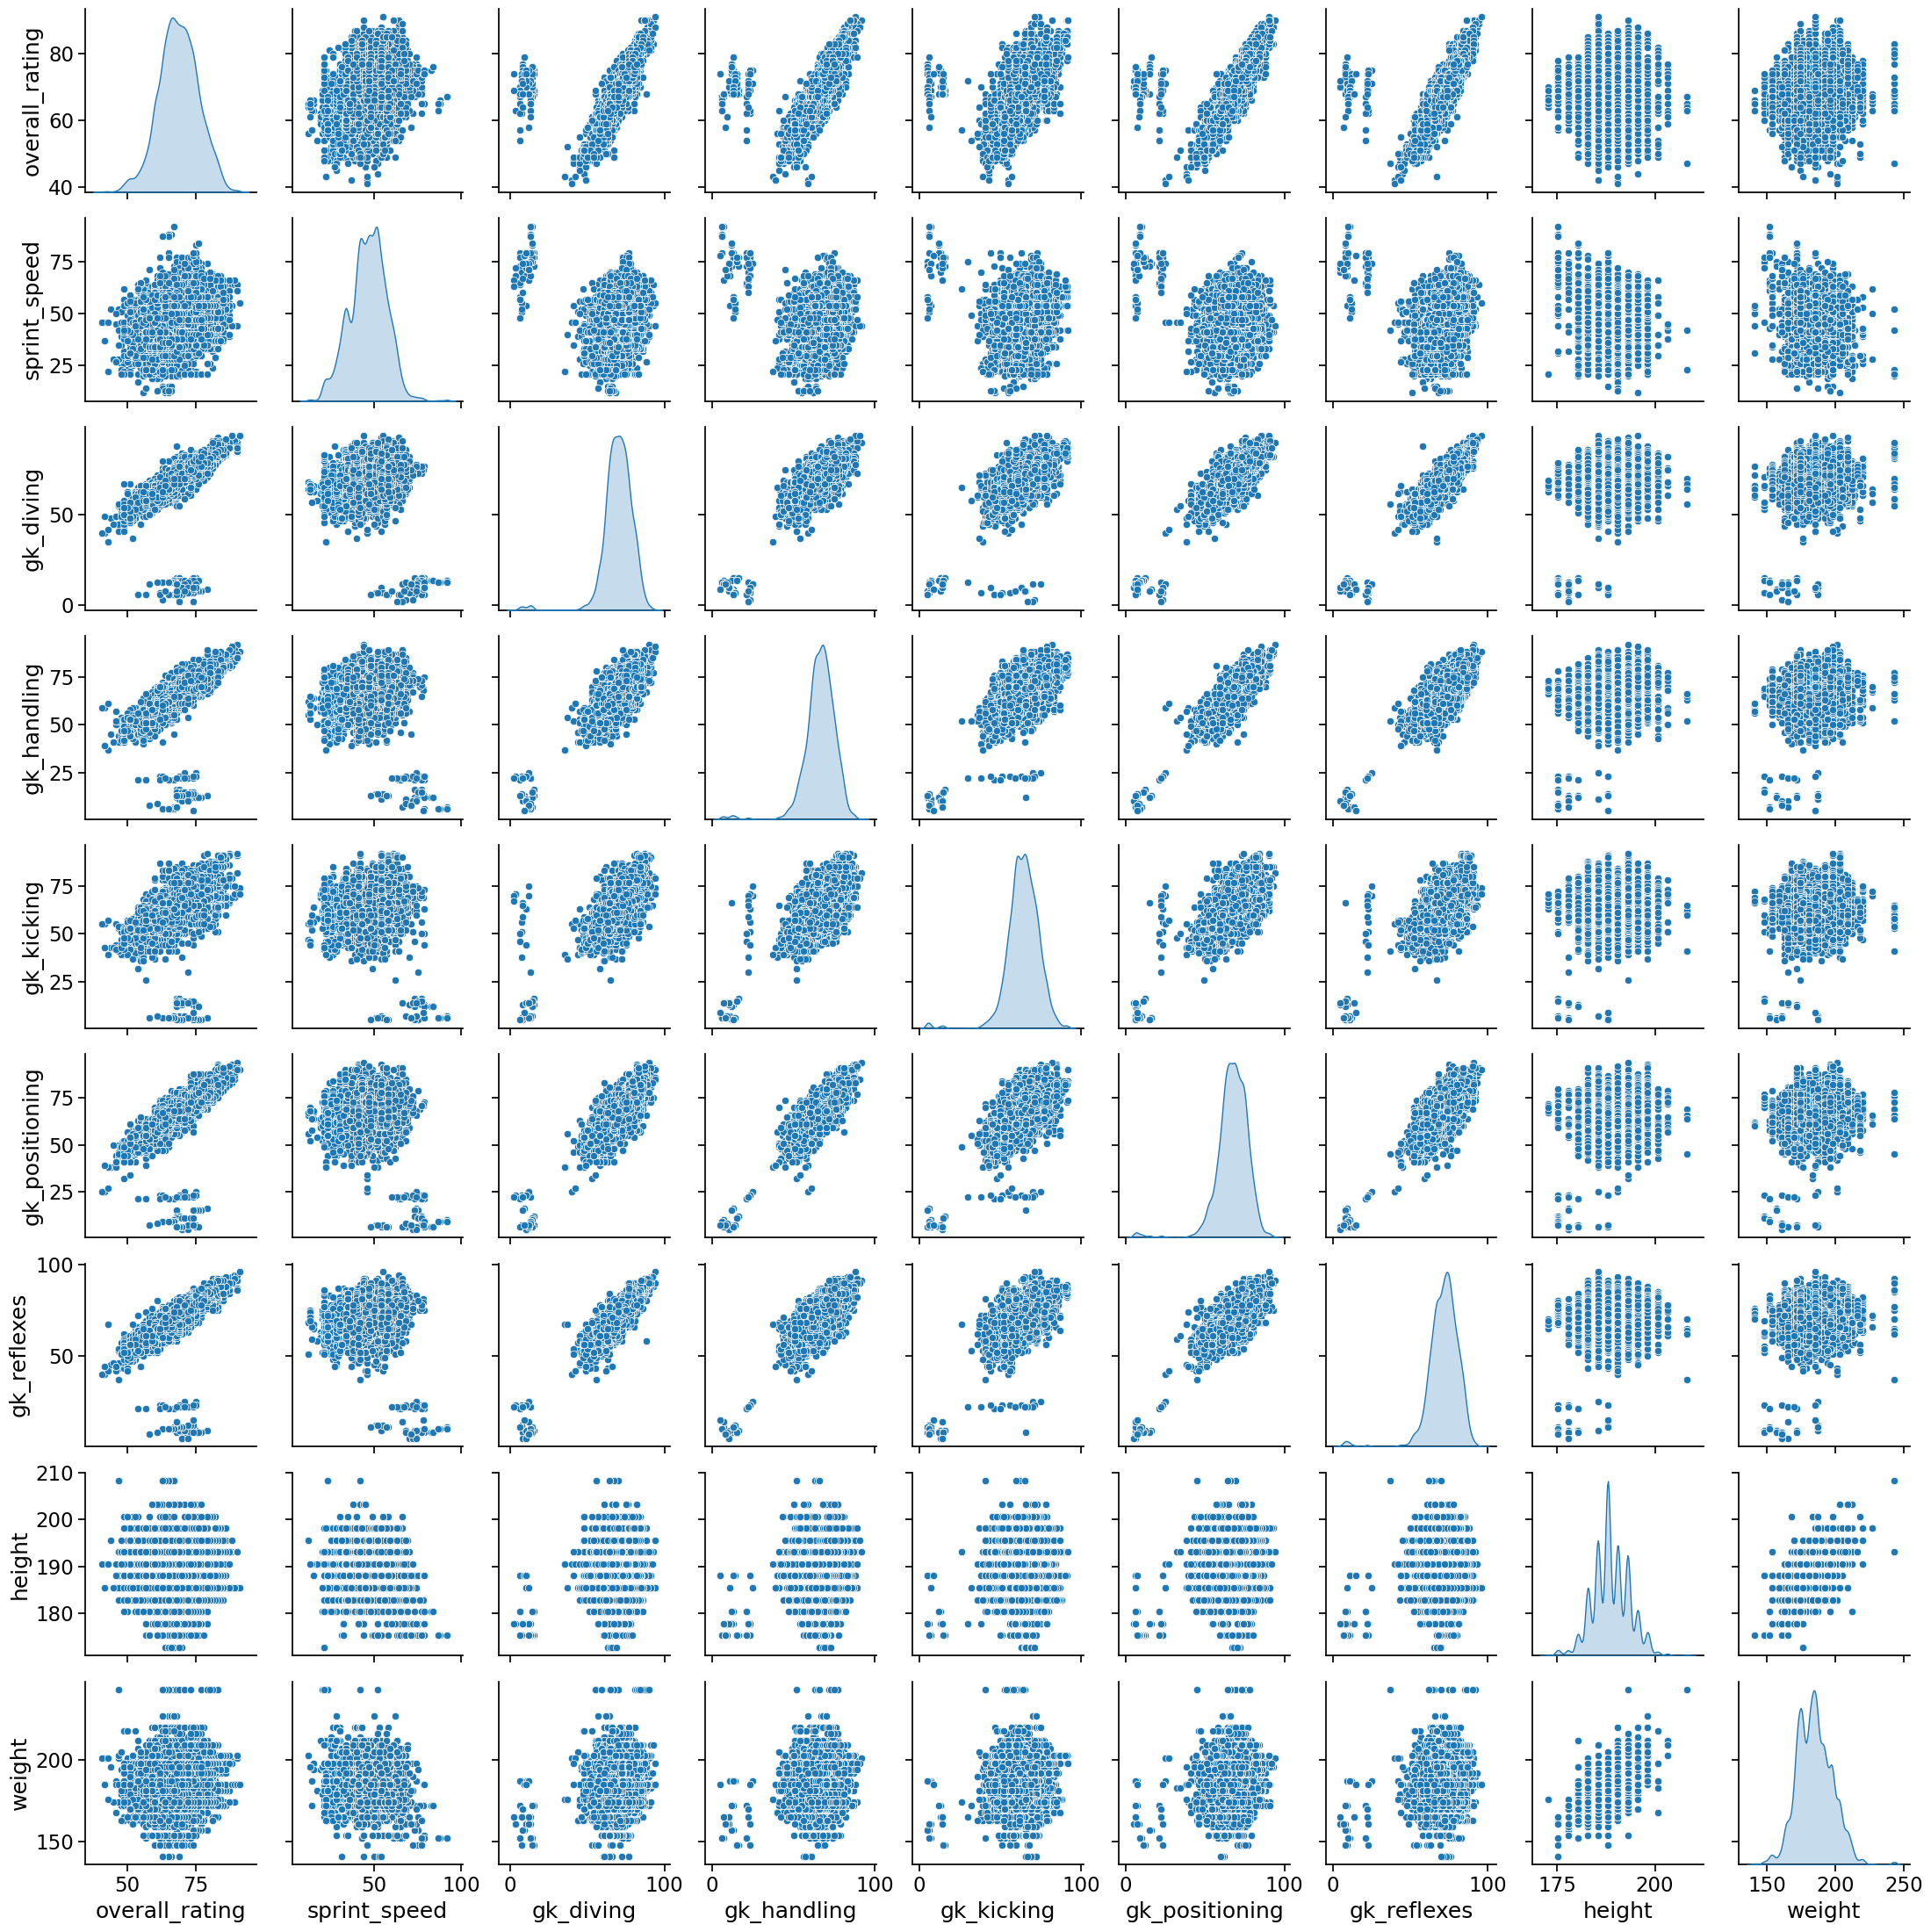

In [94]:
sns.pairplot(gk_attributes, diag_kind='kde')
plt.show()

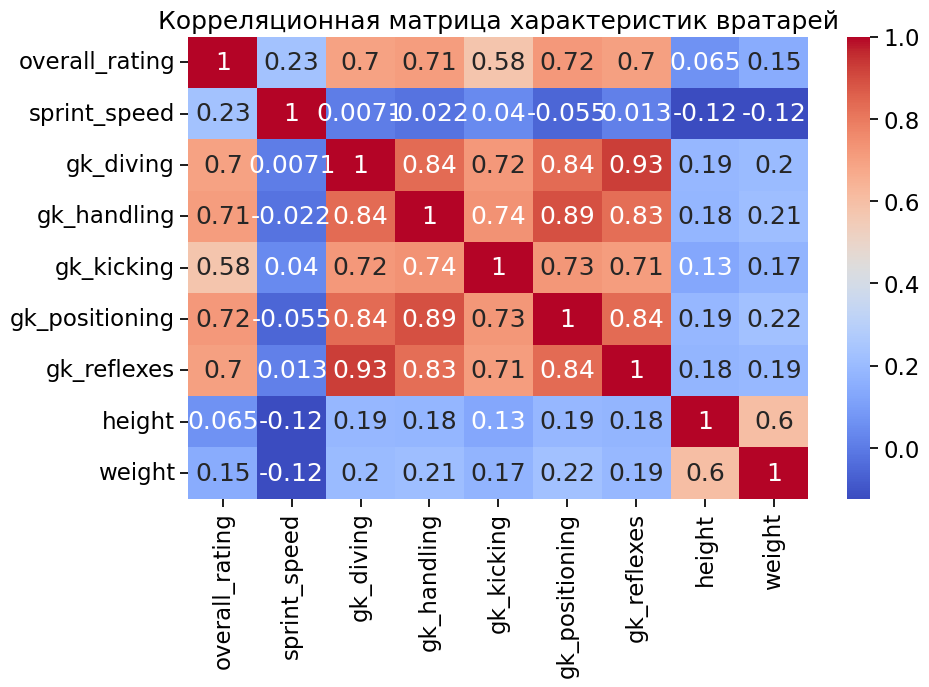

In [95]:
plt.figure(figsize=(10, 6))
sns.heatmap(gk_attributes.corr(), annot=True, cmap='coolwarm')
plt.title('Корреляционная матрица характеристик вратарей')
plt.show()

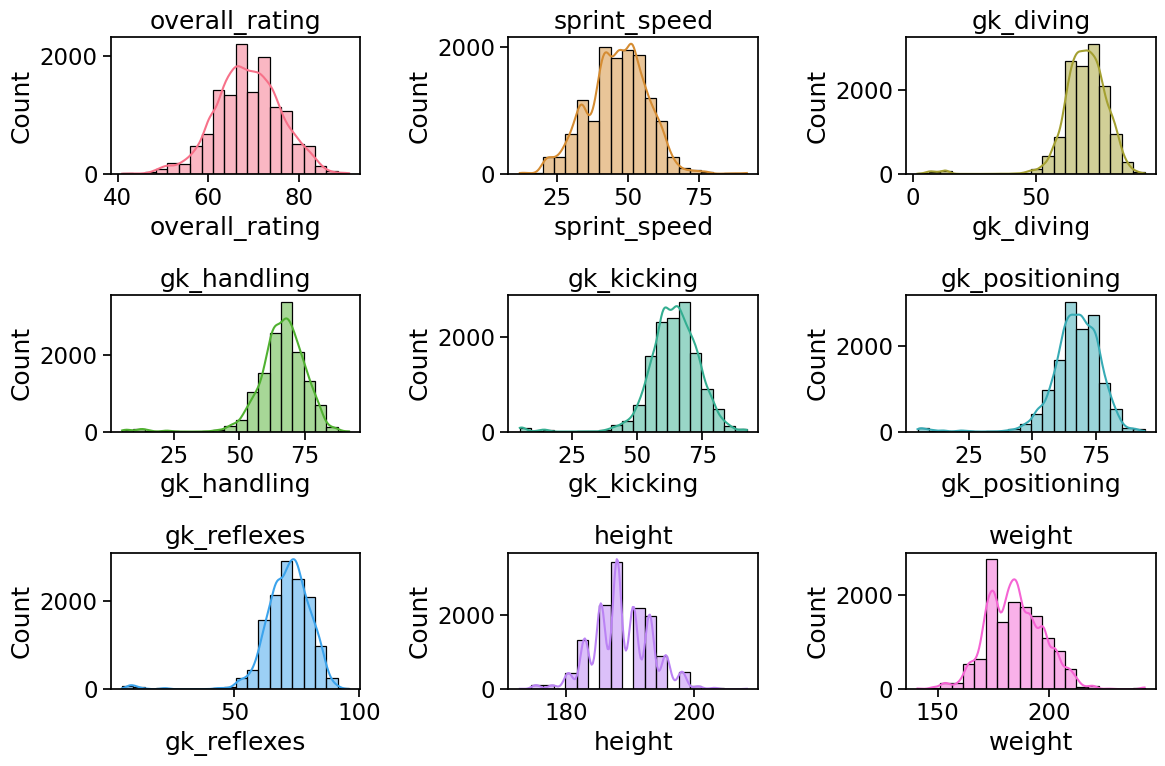

In [96]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 8))

colors = sns.color_palette('husl', n_colors=9)


for i, column in enumerate(gk_attributes.columns):
    row_index = i // 3  
    col_index = i % 3   
    sns.histplot(data=gk_attributes,bins=20, x=column, ax=axes[row_index, col_index], kde=True, color=colors[i])
    axes[row_index, col_index].set_title(column)

plt.tight_layout()
plt.show()

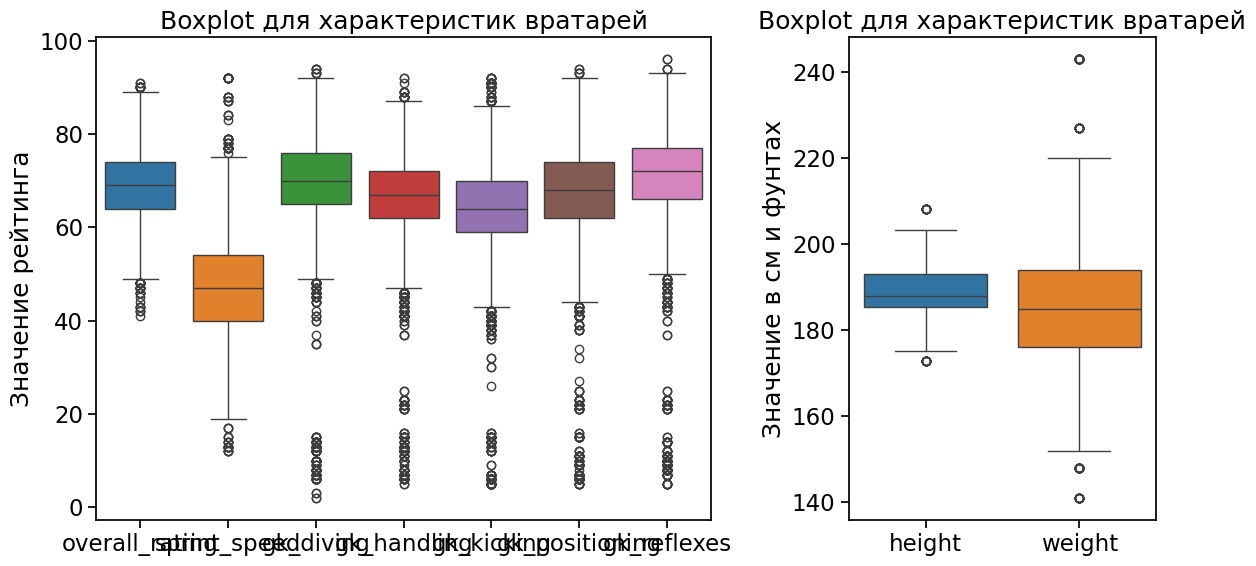

In [97]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6), gridspec_kw={'width_ratios': [2, 1]})


sns.boxplot(data=gk_attributes.drop(columns=['height', 'weight'], inplace=False), ax=axs[0])
axs[0].set_title('Boxplot для характеристик вратарей')
axs[0].set_ylabel('Значение рейтинга')

sns.boxplot(gk_attributes[['height', 'weight']], ax=axs[1])
plt.title('Boxplot для характеристик вратарей')
plt.ylabel('Значение в см и фунтах')

plt.tight_layout()
plt.show()

In [ ]:
sns.pairplot(fl_attributes, diag_kind='kde',)
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(fl_attributes.corr(), annot=True, cmap='coolwarm')
plt.title('Корреляционная матрица характеристик полевых игкроков')
plt.show()

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 8))

colors = sns.color_palette('husl', n_colors=9)


for i, column in enumerate(fl_attributes.columns):
    row_index = i // 3  
    col_index = i % 3   
    sns.histplot(data=fl_attributes,bins=20, x=column, ax=axes[row_index, col_index], kde=True, color=colors[i])
    axes[row_index, col_index].set_title(f'player {column}')

plt.tight_layout()
plt.show()

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6), gridspec_kw={'width_ratios': [2, 1]})


sns.boxplot(data=fl_attributes.drop(columns=['height', 'weight'], inplace=False), ax=axs[0])
axs[0].set_title('Boxplot для характеристик игроков')
axs[0].set_ylabel('Значение рейтинга')

sns.boxplot(fl_attributes[['height', 'weight']], ax=axs[1])
plt.title('Boxplot для характеристик игроков')
plt.ylabel('Значение в см и фунтах')

plt.tight_layout()
plt.show()